#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- The main objective of your project appears to be the prediction of diabetes in patients based on their medical history and demographic information. This prediction can be used to identify individuals who may be at risk of developing diabetes and to develop personalized treatment plans or interventions. Additionally, the dataset can be used for research purposes to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

- the dataset is focused on predicting whether clients suffer from Diabetics , 

### 2) Data Collection
- Dataset Source - 

- gender: Gender of the patient 
- age: Age of the patient in years (Numerical - float64).
- hypertension: Indicates whether the patient has hypertension 
- heart_disease: Indicates whether the patient has heart disease 
- smoking_history: Smoking history of the patient .
- bmi: Body Mass Index (BMI) of the patient 
- HbA1c_level: HbA1c level of the patient 
- blood_glucose_level: Blood glucose level of the patient 
- diabetes: Target variable indicating whether the patient has diabetes 

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [38]:
df = pd.read_csv('E:\\Bank_cicd\\notebook\\data\\diabetes_prediction_dataset.csv')

In [39]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [36]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#### Show Top 5 Records

In [6]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [20]:
print(df.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [41]:
print("\nDescriptive Statistics for Numerical Columns:")
df.describe().T


Descriptive Statistics for Numerical Columns:


,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


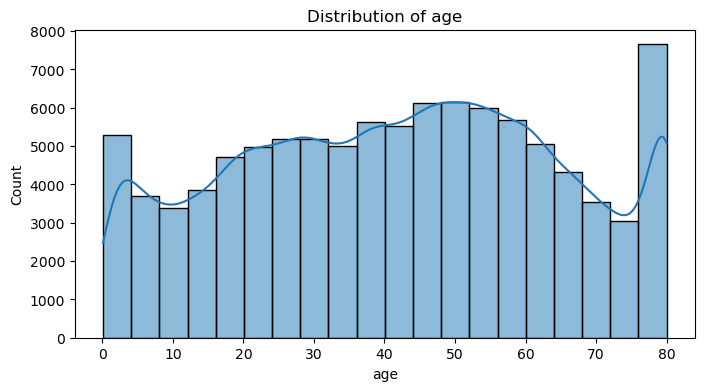

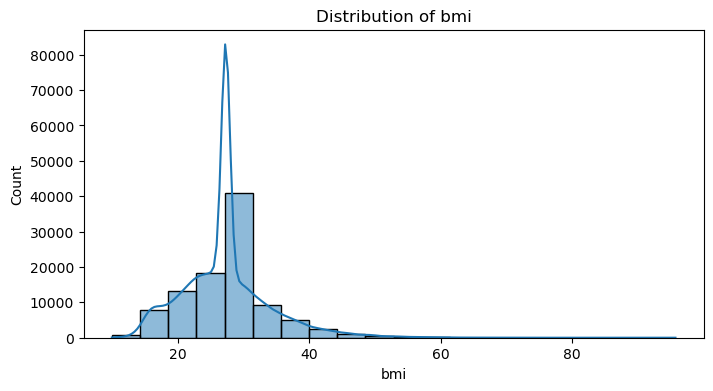

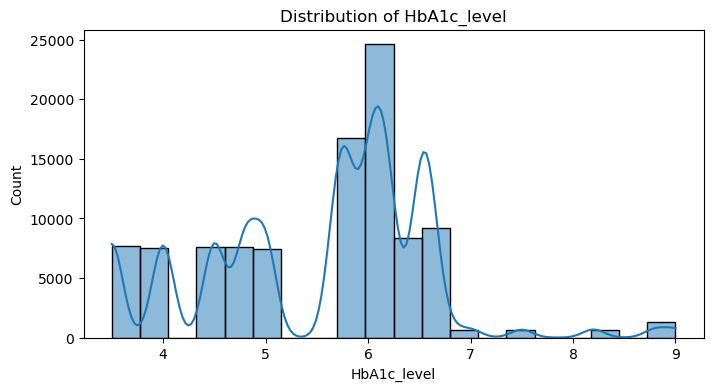

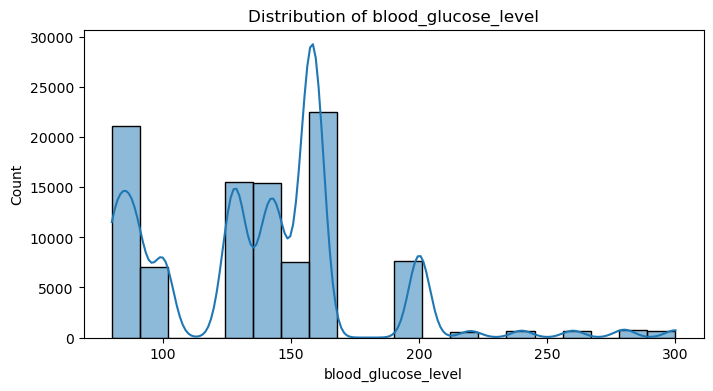

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


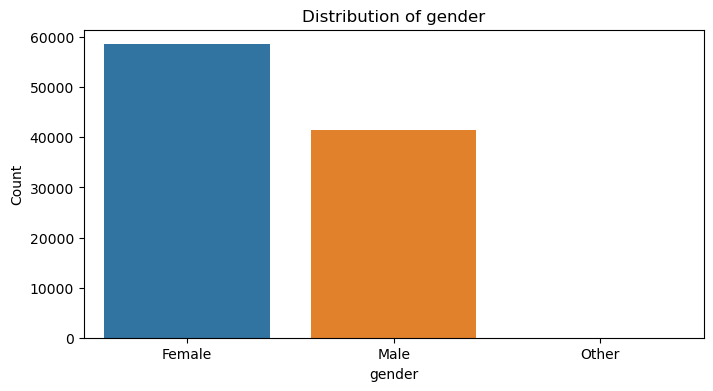

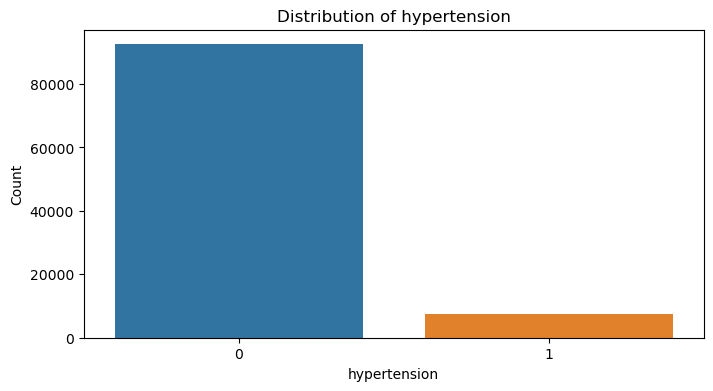

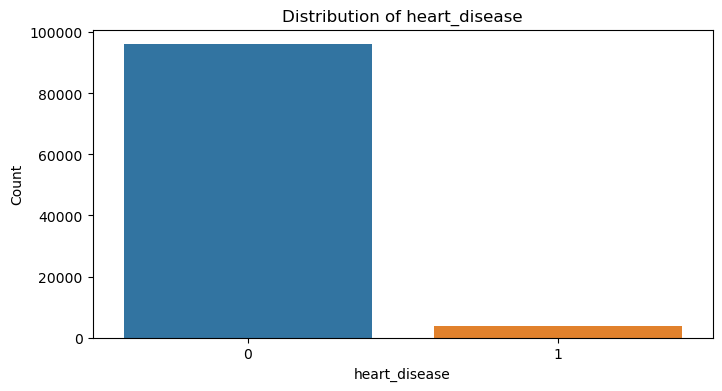

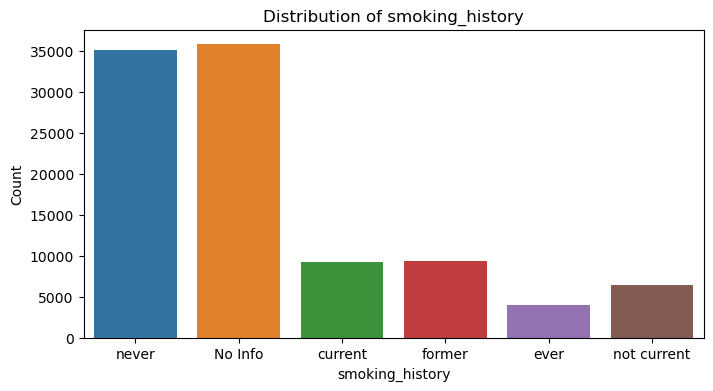

In [12]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


Target Variable Distribution:
Check the distribution of the target variable (diabetes).

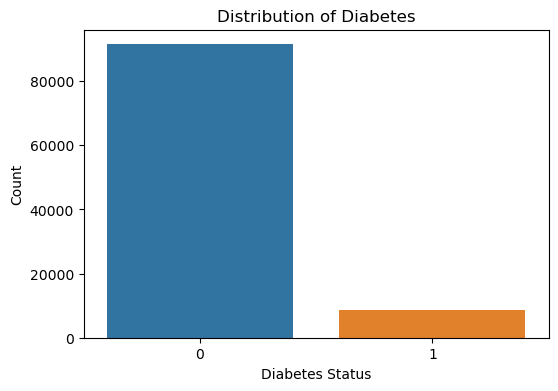

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diabetes')
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.show()


In [42]:
import pandas as pd

# Assuming df is your DataFrame
# Define numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display numerical columns
print("Numerical columns:")
print(numerical_columns)

# Display categorical columns
print("\nCategorical columns:")
print(categorical_columns)


Numerical columns:
['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

Categorical columns:
['gender', 'smoking_history']


In [43]:
# Count of unique values for categorical columns
print("\nCount of Unique Values for Categorical Columns:")
for column in df.select_dtypes(include=['object']):
    print(df[column].value_counts())
    print('\n')


Count of Unique Values for Categorical Columns:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64




Outlier Detection:
Identify potential outliers in numerical variables using box plots.

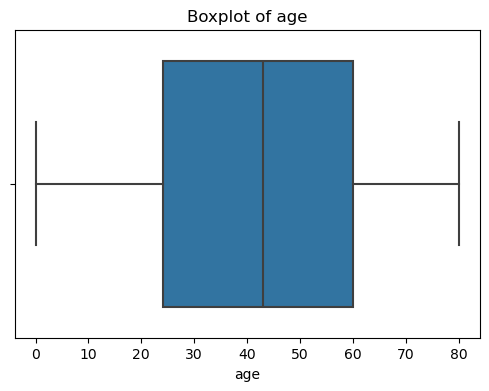

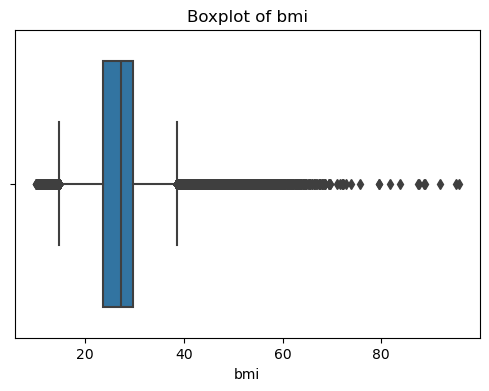

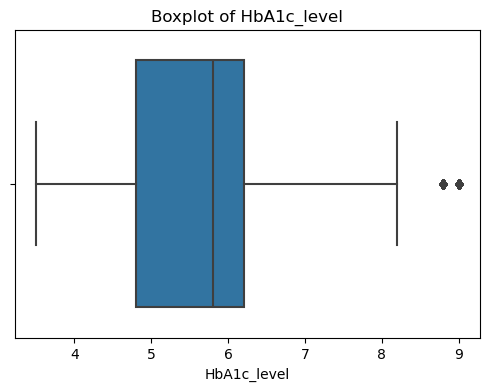

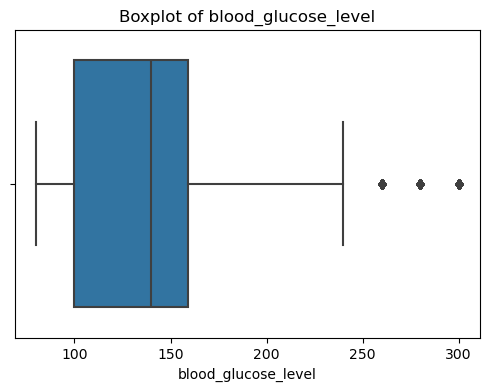

In [17]:
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()


Pairplot:
Visualize pairwise relationships between numerical variables.

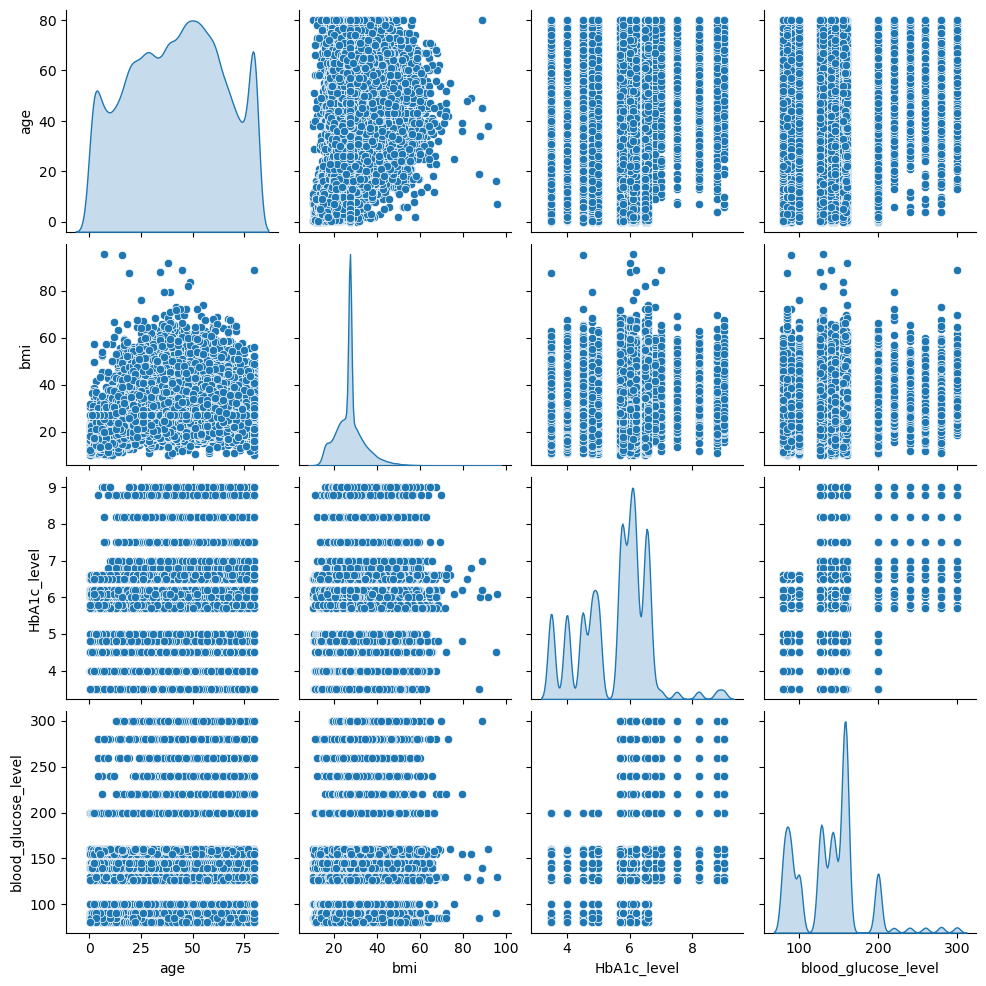

In [18]:
sns.pairplot(df[numeric_features], diag_kind='kde')
plt.show()


In [44]:
# Check for class imbalance in the target variable
class_distribution = df['diabetes'].value_counts(normalize=True)
print("Class Distribution:")
print(class_distribution)


Class Distribution:
diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64


#### here our data is imbalaned 

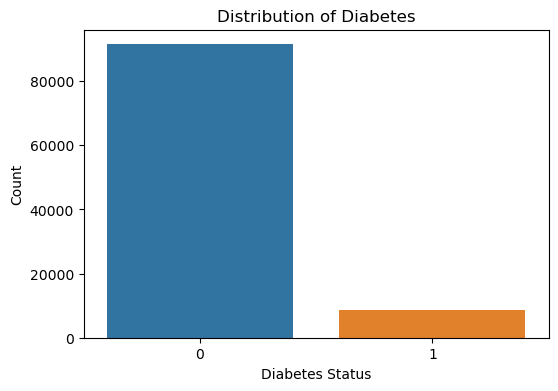

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diabetes')
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.show()


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [45]:
# Separate data for each class
class_0_data = df[df['diabetes'] == 0]
class_1_data = df[df['diabetes'] == 1]

# Take same quantity of data from class 0 as we have from class 1
num_samples_class_1 = len(class_1_data)
class_0_data_sampled = class_0_data.sample(n=num_samples_class_1, random_state=42)

# Concatenate sampled class 0 data with class 1 data
balanced_df = pd.concat([class_0_data_sampled, class_1_data], axis=0)

# Shuffle the dataframe
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution in the balanced dataset
class_distribution_balanced = balanced_df['diabetes'].value_counts(normalize=True)
print("Class Distribution in the Balanced Dataset:")
print(class_distribution_balanced)


Class Distribution in the Balanced Dataset:
diabetes
1    0.5
0    0.5
Name: proportion, dtype: float64


In [46]:
class_distribution_balanced

diabetes
1    0.5
0    0.5
Name: proportion, dtype: float64

In [47]:
balanced_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,80.0,1,0,former,27.32,8.2,140,1
1,Female,35.0,0,0,No Info,27.32,4.5,158,0
2,Female,55.0,1,0,never,27.32,8.8,220,1
3,Male,68.0,0,0,former,28.19,3.5,100,0
4,Female,26.0,0,0,not current,21.38,5.8,155,0
...,...,...,...,...,...,...,...,...,...
16995,Female,39.0,0,0,never,39.69,6.1,200,1
16996,Male,68.0,0,0,never,28.56,6.8,220,1
16997,Female,39.0,0,0,never,22.44,4.8,145,0
16998,Male,26.0,0,0,No Info,27.32,6.5,80,0


In [48]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               17000 non-null  object 
 1   age                  17000 non-null  float64
 2   hypertension         17000 non-null  int64  
 3   heart_disease        17000 non-null  int64  
 4   smoking_history      17000 non-null  object 
 5   bmi                  17000 non-null  float64
 6   HbA1c_level          17000 non-null  float64
 7   blood_glucose_level  17000 non-null  int64  
 8   diabetes             17000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.2+ MB


In [56]:
# Define a dictionary to map old category names to new category names
category_mapping = {
    'No Info': 'No_Info',
    'not current': 'not_current'
}

# Apply the mapping to the 'smoking_history' column
balanced_df['smoking_history'] = balanced_df['smoking_history'].replace(category_mapping)

# Verify the changes
unique_categories_smoking_history = balanced_df['smoking_history'].unique()
print("Unique categories in 'smoking_history' after renaming:")
print(unique_categories_smoking_history)


Unique categories in 'smoking_history' after renaming:
['former' 'No_Info' 'never' 'not_current' 'current' 'ever']


In [57]:
# Find unique categories in each categorical column
for column in categorical_columns:
    unique_categories = balanced_df[column].unique()
    print(f"Unique categories in '{column}':")
    print(unique_categories)
    print()


Unique categories in 'gender':
['Male' 'Female' 'Other']

Unique categories in 'smoking_history':
['former' 'No_Info' 'never' 'not_current' 'current' 'ever']



In [58]:
import os

# Define the path where you want to save the file
folder_path = "E:/BANK_CICD/notebook/data"
file_name = "Diabetes_prediction.csv"

# Concatenate the folder path and file name
file_path = os.path.join(folder_path, file_name)

# Save the DataFrame to CSV without the index
balanced_df.to_csv(file_path, index=False)

print(f"File saved successfully at: {file_path}")


File saved successfully at: E:/BANK_CICD/notebook/data\Diabetes_prediction.csv


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               17000 non-null  object 
 1   age                  17000 non-null  float64
 2   hypertension         17000 non-null  int64  
 3   heart_disease        17000 non-null  int64  
 4   smoking_history      17000 non-null  object 
 5   bmi                  17000 non-null  float64
 6   HbA1c_level          17000 non-null  float64
 7   blood_glucose_level  17000 non-null  int64  
 8   diabetes             17000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.2+ MB
